In [7]:
'''
PROBLEM STATEMENT-
Introduction
Customer churn is a critical issue for telecom companies as it directly impacts revenue and customer retention strategies. 
Predicting which customers are likely to churn allows companies to take proactive measures to retain them. 
This project focuses on analyzing customer churn using a dataset from an Iranian telecom company collected over 12 months. 
The dataset contains various customer-related attributes and the target variable 'Churn', indicating whether a customer has left the service.

Objectives
1. To identify Key Factors Influencing Customer Churn.
2. To analyze the dataset to identify significant factors contributing to customer churn.

Model Development and Comparison:
1. To implement and compare the performance of three machine learning algorithms: Random Forest, k-Nearest Neighbors (kNN), and XGBoost.
2. To determine the most effective model for predicting customer churn.
3. To use a new record and predict and write the observations.

'''

"\nPROBLEM STATEMENT-\nIntroduction\nCustomer churn is a critical issue for telecom companies as it directly impacts revenue and customer retention strategies. \nPredicting which customers are likely to churn allows companies to take proactive measures to retain them. \nThis project focuses on analyzing customer churn using a dataset from an Iranian telecom company collected over 12 months. \nThe dataset contains various customer-related attributes and the target variable 'Churn', indicating whether a customer has left the service.\n\nObjectives\n1. To identify Key Factors Influencing Customer Churn.\n2. To analyze the dataset to identify significant factors contributing to customer churn.\n\nModel Development and Comparison:\n1. To implement and compare the performance of three machine learning algorithms: Random Forest, k-Nearest Neighbors (kNN), and XGBoost.\n2. To determine the most effective model for predicting customer churn.\n3. To use a new record and predict and write the obs

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline


In [15]:
#Using Random Forest Machine Learning Algorithm 
#Reading the data set.
df = pd.read_csv("C://Users//HP//Downloads//Customer Churn.csv")

In [17]:
#To verify the correct loading of data set
df.head(10)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
5,11,0,38,1,3775,82,32,28,3,1,1,30,282.280,0
6,4,0,38,0,2360,39,285,18,3,1,1,30,1235.960,0
7,13,0,37,2,9115,121,144,43,3,1,1,30,945.440,0
8,7,0,38,0,13773,169,0,44,3,1,1,30,557.680,0
9,7,0,38,1,4515,83,2,25,3,1,1,30,191.920,0


In [19]:
#Checking for simple descriptive statistics
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [21]:
#Checking for the missing values
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [23]:
#Perform scaling
from sklearn.preprocessing import StandardScaler

In [25]:
ss = StandardScaler()

In [27]:
df['Seconds of Use']=ss.fit_transform(df[['Seconds of Use']])

In [29]:
df['Customer Value']=ss.fit_transform(df[['Customer Value']])

In [31]:
df.tail(10)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
3140,16,0,29,0,-0.826128,31,17,9,3,1,2,30,-0.699380,0
3141,5,0,28,0,-0.796347,16,28,5,4,1,2,45,-0.720253,0
3142,15,0,27,1,-0.701046,38,26,15,2,1,1,25,-0.548258,0
3143,7,0,27,1,-0.224543,67,15,25,3,1,1,30,-0.516687,0
3144,7,0,20,1,-0.589068,32,35,16,3,1,1,30,-0.483027,0
3145,21,0,19,2,0.530000,147,92,44,2,2,1,25,0.485570,0
3146,17,0,17,1,1.135160,177,80,42,5,1,1,55,-0.405783,0
3147,13,0,18,4,-0.313410,51,38,21,3,1,1,30,-0.368815,0
3148,7,0,11,2,0.053021,46,222,12,3,1,1,30,1.173589,0
3149,8,1,11,2,-0.638624,25,7,9,3,1,1,30,-0.716326,1


In [35]:
#Dividing the data set into training and testing
from sklearn.model_selection import train_test_split

In [37]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [39]:
X = df[['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age', 'Customer Value']]
Y = df['Churn']

In [49]:
#Dividing the Dataset into training and testing

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3) #70% training part

In [51]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf1=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train,Y_train)

Y_pred1=clf1.predict(X_test)

In [53]:
Y_pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [55]:
Y_test

948     0
479     0
169     0
1323    0
2961    0
       ..
2632    0
2968    1
113     0
2061    0
655     0
Name: Churn, Length: 945, dtype: int64

In [141]:
#Finding the Confusion Matrix
confusion_matrix(Y_test, Y_pred1)

array([[777,  12],
       [ 38, 118]], dtype=int64)

In [133]:
print ("Random Forest Classifier...")
print("accuracy: ",accuracy_score(Y_pred1,Y_test), "precision: ", precision_score(Y_pred1,Y_test), "recall: ", recall_score(Y_pred1,Y_test), "F1 score: ", f1_score(Y_pred1,Y_test))

Random Forest Classifier...
accuracy:  0.9470899470899471 precision:  0.7564102564102564 recall:  0.9076923076923077 F1 score:  0.8251748251748252


In [61]:
clf1.feature_importances_

array([0.0611928 , 0.1858806 , 0.12440537, 0.01315832, 0.12297758,
       0.10386111, 0.05138171, 0.0715064 , 0.02987661, 0.00144076,
       0.12258761, 0.03165054, 0.08008059])

In [63]:
#finding out important features of the model
feature_imp = pd.Series(clf1.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Complains                  0.185881
Subscription  Length       0.124405
Seconds of Use             0.122978
Status                     0.122588
Frequency of use           0.103861
Customer Value             0.080081
Distinct Called Numbers    0.071506
Call  Failure              0.061193
Frequency of SMS           0.051382
Age                        0.031651
Age Group                  0.029877
Charge  Amount             0.013158
Tariff Plan                0.001441
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


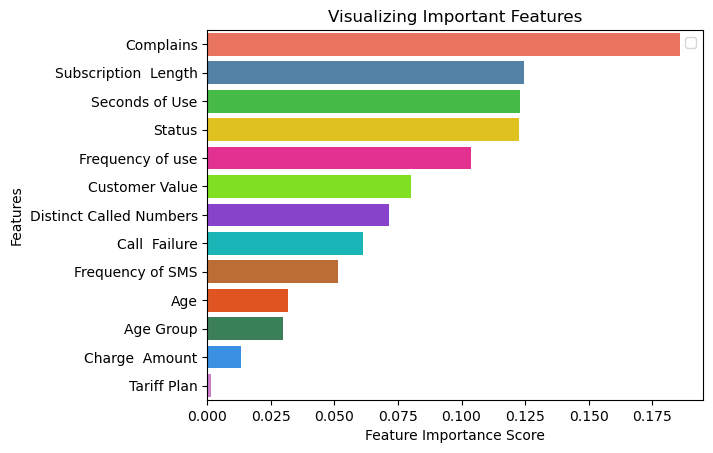

In [65]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
custom_colors = [
    "#FF6347", "#4682B4", "#32CD32", "#FFD700", "#FF1493", "#7FFF00", 
    "#8A2BE2", "#00CED1", "#D2691E", "#FF4500", "#2E8B57", "#1E90FF", "#DA70D6"]
sns.barplot(x=feature_imp, y=feature_imp.index,hue=feature_imp.index, palette=custom_colors)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [67]:
from sklearn.tree import plot_tree

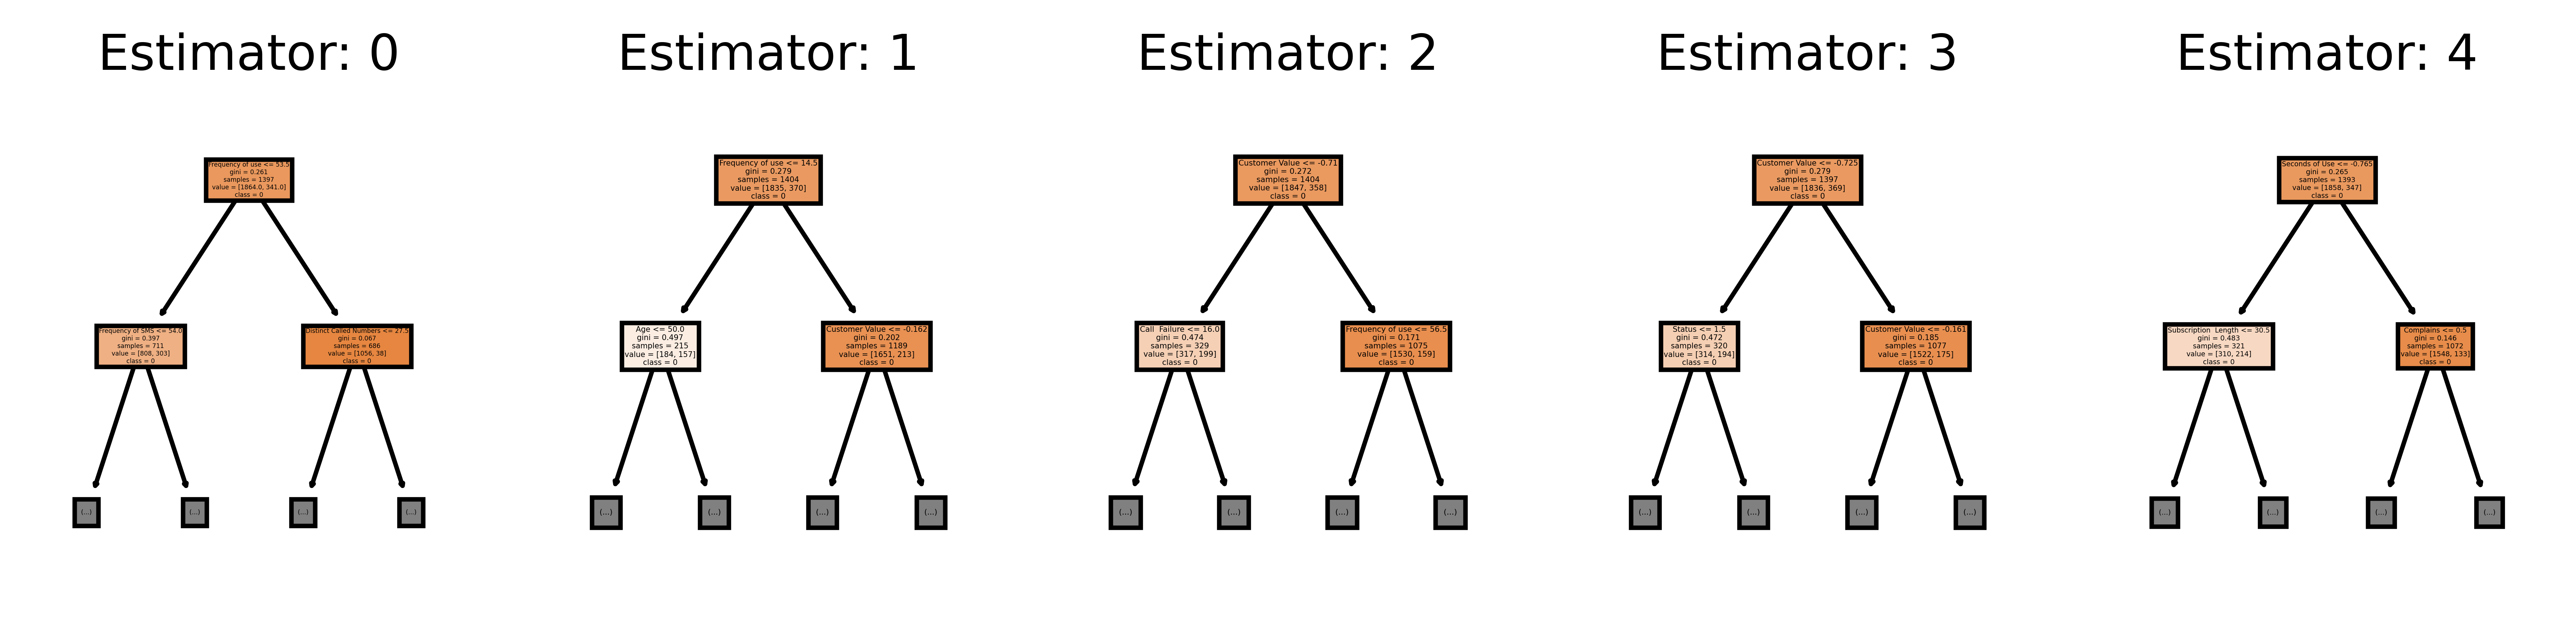

In [69]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf1.estimators_[index],
                   max_depth=1,
                   feature_names = ['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age', 'Customer Value'],
                   class_names=["0", "1"],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

In [79]:
#Using KNN Machine Learning Algorithm 
from sklearn.neighbors import KNeighborsClassifier

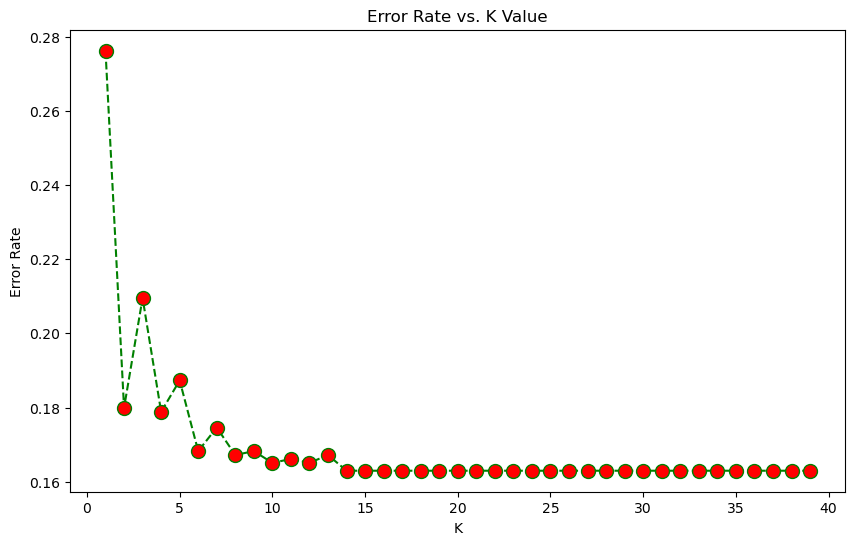

Minimum error:- 0.16296296296296298 at K = 14


In [81]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [83]:
knn = KNeighborsClassifier(n_neighbors=14)

In [85]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=14)

In [89]:
Y_pred2 = knn.predict(X_test)

In [91]:
Y_pred2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,

In [93]:
Y_test

948     0
479     0
169     0
1323    0
2961    0
       ..
2632    0
2968    1
113     0
2061    0
655     0
Name: Churn, Length: 945, dtype: int64

In [143]:
#Finding the Confusion Matrix
confusion_matrix(Y_test, Y_pred2)

array([[778,  11],
       [ 49, 107]], dtype=int64)

In [135]:
print ("kNN Classifier...")
print("accuracy: ",accuracy_score(Y_pred2,Y_test), "precision: ", precision_score(Y_pred2,Y_test), "recall: ", recall_score(Y_pred2,Y_test), "F1 score: ", f1_score(Y_pred2,Y_test))

kNN Classifier...
accuracy:  0.9365079365079365 precision:  0.6858974358974359 recall:  0.9067796610169492 F1 score:  0.781021897810219


In [101]:
#Using XGBoost Machine Learning Algorithm 

In [107]:
#Import XGBoost
import xgboost as xgb

xgbclass = xgb.XGBClassifier()
xgbclass.fit(X_train, Y_train)

Y_pred3=xgbclass.predict(X_test)

In [137]:
xgbclass.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [111]:
Y_pred3 = xgbclass.predict(X_test)

In [113]:
Y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [127]:
#Finding the Confusion Matrix
confusion_matrix(Y_test, Y_pred3)

array([[751,  38],
       [156,   0]], dtype=int64)

In [139]:
print ("XGBoost Classifier...")
print("accuracy: ",accuracy_score(Y_pred3,Y_test), "precision: ", precision_score(Y_pred3,Y_test), "recall: ", recall_score(Y_pred3,Y_test), "F1 score: ", f1_score(Y_pred3,Y_test))

XGBoost Classifier...
accuracy:  0.7947089947089947 precision:  0.0 recall:  0.0 F1 score:  0.0


Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value'],
      dtype='object')

In [121]:
feature_imp = pd.Series(xgbclass.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Call  Failure              0.093868
Customer Value             0.093550
Seconds of Use             0.091030
Frequency of use           0.087733
Status                     0.086842
Charge  Amount             0.086023
Subscription  Length       0.083803
Age Group                  0.083704
Frequency of SMS           0.083039
Distinct Called Numbers    0.081769
Complains                  0.072086
Tariff Plan                0.056553
Age                        0.000000
dtype: float32

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


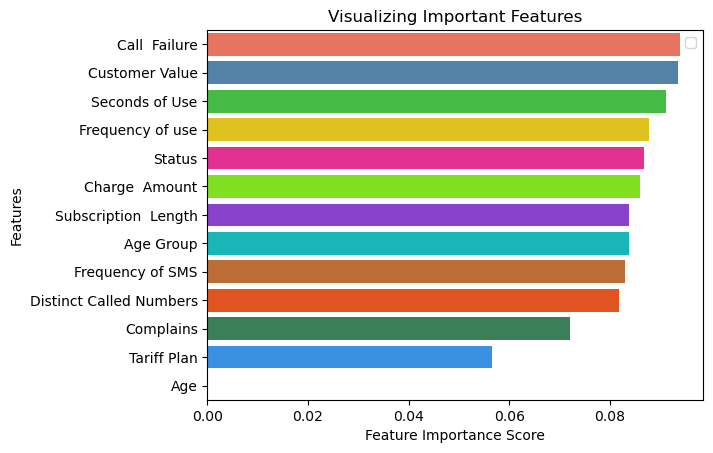

In [123]:
#visualizing feature importance results
# Creating a bar plot
custom_colors = [
    "#FF6347", "#4682B4", "#32CD32", "#FFD700", "#FF1493", "#7FFF00", 
    "#8A2BE2", "#00CED1", "#D2691E", "#FF4500", "#2E8B57", "#1E90FF", "#DA70D6"]
sns.barplot(x=feature_imp, y=feature_imp.index,hue=feature_imp.index, palette=custom_colors)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [151]:
#Reading new record to predict
new_data = pd.read_excel("C://Users//HP//OneDrive//Desktop//NEW Data_Customer Churn.xlsx")

In [153]:
new_data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
0,25,0,38,3,15140,225,54,32,3,1,1,30,830.6


In [157]:
#Predicting the Customer Churn using Random Forest Algorithm
clf1.predict(new_data)

array([0], dtype=int64)

In [159]:
#Predicting the Customer Churn using KNN Algorithm
knn.predict(new_data)

array([0], dtype=int64)

In [161]:
#Predicting the Customer Churn using XGBoost Algorithm
xgbclass.predict(new_data)

array([0])

In [165]:
'''
Observation after using the new data record to check whether the three models are predicting the Customer Churn correctly or not.
-After using the three models it can be seen that all the three models are correctly predicting the customer churn for the new data record.
'''


'\nObservation after using the new data record to check whether the three models are predicting the Customer Churn correctly or not.\n-After using the three models it can be seen that all the three models are correctly predicting the customer churn for the new data record.\n'

In [145]:
'''
Comparison of Model Performances

Performance Metrics

1. Random Forest Classifier:
   - Accuracy: 94.71%
   - Precision: 75.64%
   - Recall: 90.77%
   - F1 Score: 82.52%

2. kNN Classifier:
   - Accuracy: 93.65%
   - Precision: 68.59%
   - Recall: 90.68%
   - F1 Score: 78.10%

3. XGBoost Classifier:
   - Accuracy: 79.47%
   - Precision: 0.00%
   - Recall: 0.00%
   - F1 Score: 0.00%

Analysis

1.Accuracy:
   - Random Forest Classifier has the highest accuracy at 94.71%.
   - kNN Classifier follows closely with an accuracy of 93.65%.
   - XGBoost Classifier has the lowest accuracy at 79.47%.

2. Precision:
   - Random Forest Classifier has the highest precision at 75.64%, indicating it is better at predicting positive churn 
     cases correctly compared to kNN.
   - kNN Classifier has a lower precision of 68.59%.
   - XGBoost Classifier has a precision of 0%, indicating it failed to correctly predict any positive churn cases.

3. Recall:
   - Both Random Forest Classifier (90.77%) and kNN Classifier (90.68%) have high recall rates, 
     indicating they are both good at identifying actual churn cases.
   - XGBoost Classifier has a recall of 0%, showing it did not identify any actual churn cases correctly.

4. F1 Score:
   - Random Forest Classifier has the highest F1 score of 82.52%, suggesting a good balance between precision and recall.
   - kNN Classifier has an F1 score of 78.10%, indicating it is also fairly balanced but less so than the Random Forest Classifier.
   - XGBoost Classifier has an F1 score of 0%, indicating very poor performance in predicting churn.

Conclusion

Based on the performance metrics,
1. The Random Forest Classifier is the best model for predicting customer churn in this dataset. 
2. It has the highest accuracy, precision, recall, and F1 score among the three algorithms. 
3. The kNN Classifier also performs well but is slightly behind the Random Forest Classifier. 
4. The XGBoost Classifier, on the other hand, performs poorly in this context and is
    not suitable for predicting customer churn with this dataset.

'''

'\nComparison of Model Performances\n\nPerformance Metrics\n\n1. Random Forest Classifier:\n   - Accuracy: 94.71%\n   - Precision: 75.64%\n   - Recall: 90.77%\n   - F1 Score: 82.52%\n\n2. kNN Classifier:\n   - Accuracy: 93.65%\n   - Precision: 68.59%\n   - Recall: 90.68%\n   - F1 Score: 78.10%\n\n3. XGBoost Classifier:\n   - Accuracy: 79.47%\n   - Precision: 0.00%\n   - Recall: 0.00%\n   - F1 Score: 0.00%\n\nAnalysis\n\n1.Accuracy:\n   - Random Forest Classifier has the highest accuracy at 94.71%.\n   - kNN Classifier follows closely with an accuracy of 93.65%.\n   - XGBoost Classifier has the lowest accuracy at 79.47%.\n\n2. Precision:\n   - Random Forest Classifier has the highest precision at 75.64%, indicating it is better at predicting positive churn \n     cases correctly compared to kNN.\n   - kNN Classifier has a lower precision of 68.59%.\n   - XGBoost Classifier has a precision of 0%, indicating it failed to correctly predict any positive churn cases.\n\n3. Recall:\n   - Both